In [169]:
import numpy as np
from astropy.convolution import *
import sys
import os
sys.path.append(os.path.abspath('..'))
%matplotlib notebook

# utils=os.path.abspath('..')
from utils import *
import time
convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);



In [170]:
# def findhfir():
import scipy.signal as spsig
spsig.convolve2d;
configs=list(range(0,2**9))

configs=[];
for i in list(range(0,2**9)):
    configs+=[list(base2bin(str(i),10,9))];
configs=np.reshape(configs,[512,3,3]).astype(np.int)
fir=np.reshape(2**np.arange(0,9),[3,3]);

pj=[0]*512;
# configs[0]
equilst=[0]*8
# conflst=np.zeros(3,3,)
for conf0 in configs[:,:,:]:
    rnum=spsig.convolve2d(conf0,fir,'valid').flat[0];
    for i in range(8):
        if i>=4:
            conf=np.rot90(conf0.T,i%4);
        else:
            conf=np.rot90(conf0,i%4);
        equinum=spsig.convolve2d(conf,fir,'valid').flat[0];
#         print(conf)
        equilst[i] = equinum;
    pass
#     print(rnum)
#     print(min(equilst))
    pj[rnum] = min(equilst);
# print(pj)
# sort()

compress=np.zeros([512],np.int);
for i,k in enumerate(np.unique(pj)):
    compress[k]=i;
rca2ntca=compress[pj];
# print(list(rca2ntca))
# [i[0] for i in sorted(enumerate(pj), key=lambda x:x[1])]

#     print(min(equilst))
# equilst
# np.rot90(fir,0)
# print(rca2ntca)

In [171]:
henseldict=['b0_','b1c','b1e','b2a','b2c','b3i','b2e','b3a','b2k','b3n','b3j','b4a','s0_','s1c','s1e','s2a','s2c','s3i','s2e','s3a','s2k','s3n','s3j','s4a','b2i','b3r','b3e','b4r','b4i','b5i','s2i','s3r','s3e','s4r','s4i','s5i','b2n','b3c','b3q','b4n','b4w','b5a','s2n','s3c','s3q','s4n','s4w','s5a','b3y','b3k','b4k','b4y','b4q','b5j','b4t','b4j','b5n','b4z','b5r','b5q','b6a','s3y','s3k','s4k','s4y','s4q','s5j','s4t','s4j','s5n','s4z','s5r','s5q','s6a','b4e','b5c','b5y','b6c','s4e','s5c','s5y','s6c','b5k','b6k','b6n','b7c','s5k','s6k','s6n','s7c','b4c','b5e','b6e','s4c','s5e','s6e','b6i','b7e','s6i','s7e','b8_','s8_',];
# kb_2dntca={};
# rca2ntca=[0, 1, 2, 3, 1, 4, 3, 5, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 13, 16, 15, 17, 14, 15, 18, 19, 20, 21, 22, 23, 2, 8, 6, 10, 3, 9, 7, 11, 24, 25, 26, 27, 25, 28, 27, 29, 14, 20, 18, 22, 15, 21, 19, 23, 30, 31, 32, 33, 31, 34, 33, 35, 1, 4, 8, 9, 36, 37, 38, 39, 3, 5, 10, 11, 38, 39, 40, 41, 13, 16, 20, 21, 42, 43, 44, 45, 15, 17, 22, 23, 44, 45, 46, 47, 8, 48, 49, 50, 38, 51, 52, 53, 25, 54, 55, 56, 57, 58, 59, 60, 20, 61, 62, 63, 44, 64, 65, 66, 31, 67, 68, 69, 70, 71, 72, 73, 2, 8, 24, 25, 8, 48, 25, 54, 6, 10, 26, 27, 49, 50, 55, 56, 14, 20, 30, 31, 20, 61, 31, 67, 18, 22, 32, 33, 62, 63, 68, 69, 6, 49, 26, 55, 10, 50, 27, 56, 26, 55, 74, 75, 55, 76, 75, 77, 18, 62, 32, 68, 22, 63, 33, 69, 32, 68, 78, 79, 68, 80, 79, 81, 3, 9, 25, 28, 38, 51, 57, 58, 7, 11, 27, 29, 52, 53, 59, 60, 15, 21, 31, 34, 44, 64, 70, 71, 19, 23, 33, 35, 65, 66, 72, 73, 10, 50, 55, 76, 40, 82, 59, 83, 27, 56, 75, 77, 59, 83, 84, 85, 22, 63, 68, 80, 46, 86, 72, 87, 33, 69, 79, 81, 72, 87, 88, 89, 1, 36, 8, 38, 4, 37, 9, 39, 8, 38, 49, 52, 48, 51, 50, 53, 13, 42, 20, 44, 16, 43, 21, 45, 20, 44, 62, 65, 61, 64, 63, 66, 3, 38, 10, 40, 5, 39, 11, 41, 25, 57, 55, 59, 54, 58, 56, 60, 15, 44, 22, 46, 17, 45, 23, 47, 31, 70, 68, 72, 67, 71, 69, 73, 4, 37, 48, 51, 37, 90, 51, 91, 9, 39, 50, 53, 51, 91, 82, 92, 16, 43, 61, 64, 43, 93, 64, 94, 21, 45, 63, 66, 64, 94, 86, 95, 9, 51, 50, 82, 39, 91, 53, 92, 28, 58, 76, 83, 58, 96, 83, 97, 21, 64, 63, 86, 45, 94, 66, 95, 34, 71, 80, 87, 71, 98, 87, 99, 3, 38, 25, 57, 9, 51, 28, 58, 10, 40, 55, 59, 50, 82, 76, 83, 15, 44, 31, 70, 21, 64, 34, 71, 22, 46, 68, 72, 63, 86, 80, 87, 7, 52, 27, 59, 11, 53, 29, 60, 27, 59, 75, 84, 56, 83, 77, 85, 19, 65, 33, 72, 23, 66, 35, 73, 33, 72, 79, 88, 69, 87, 81, 89, 5, 39, 54, 58, 39, 91, 58, 96, 11, 41, 56, 60, 53, 92, 83, 97, 17, 45, 67, 71, 45, 94, 71, 98, 23, 47, 69, 73, 66, 95, 87, 99, 11, 53, 56, 83, 41, 92, 60, 97, 29, 60, 77, 85, 60, 97, 85, 100, 23, 66, 69, 87, 47, 95, 73, 99, 35, 73, 81, 89, 73, 99, 89, 101]
rca2ntca=[0, 1, 2, 3, 1, 4, 3, 5, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 13, 16, 15, 17, 14, 15, 18, 19, 20, 21, 22, 23, 2, 8, 6, 10, 3, 9, 7, 11, 24, 25, 26, 27, 25, 28, 27, 29, 14, 20, 18, 22, 15, 21, 19, 23, 30, 31, 32, 33, 31, 34, 33, 35, 1, 4, 8, 9, 36, 37, 38, 39, 3, 5, 10, 11, 38, 39, 40, 41, 13, 16, 20, 21, 42, 43, 44, 45, 15, 17, 22, 23, 44, 45, 46, 47, 8, 48, 49, 50, 38, 51, 52, 53, 25, 54, 55, 56, 57, 58, 59, 60, 20, 61, 62, 63, 44, 64, 65, 66, 31, 67, 68, 69, 70, 71, 72, 73, 2, 8, 24, 25, 8, 48, 25, 54, 6, 10, 26, 27, 49, 50, 55, 56, 14, 20, 30, 31, 20, 61, 31, 67, 18, 22, 32, 33, 62, 63, 68, 69, 6, 49, 26, 55, 10, 50, 27, 56, 26, 55, 74, 75, 55, 76, 75, 77, 18, 62, 32, 68, 22, 63, 33, 69, 32, 68, 78, 79, 68, 80, 79, 81, 3, 9, 25, 28, 38, 51, 57, 58, 7, 11, 27, 29, 52, 53, 59, 60, 15, 21, 31, 34, 44, 64, 70, 71, 19, 23, 33, 35, 65, 66, 72, 73, 10, 50, 55, 76, 40, 82, 59, 83, 27, 56, 75, 77, 59, 83, 84, 85, 22, 63, 68, 80, 46, 86, 72, 87, 33, 69, 79, 81, 72, 87, 88, 89, 1, 36, 8, 38, 4, 37, 9, 39, 8, 38, 49, 52, 48, 51, 50, 53, 13, 42, 20, 44, 16, 43, 21, 45, 20, 44, 62, 65, 61, 64, 63, 66, 3, 38, 10, 40, 5, 39, 11, 41, 25, 57, 55, 59, 54, 58, 56, 60, 15, 44, 22, 46, 17, 45, 23, 47, 31, 70, 68, 72, 67, 71, 69, 73, 4, 37, 48, 51, 37, 90, 51, 91, 9, 39, 50, 53, 51, 91, 82, 92, 16, 43, 61, 64, 43, 93, 64, 94, 21, 45, 63, 66, 64, 94, 86, 95, 9, 51, 50, 82, 39, 91, 53, 92, 28, 58, 76, 83, 58, 96, 83, 97, 21, 64, 63, 86, 45, 94, 66, 95, 34, 71, 80, 87, 71, 98, 87, 99, 3, 38, 25, 57, 9, 51, 28, 58, 10, 40, 55, 59, 50, 82, 76, 83, 15, 44, 31, 70, 21, 64, 34, 71, 22, 46, 68, 72, 63, 86, 80, 87, 7, 52, 27, 59, 11, 53, 29, 60, 27, 59, 75, 84, 56, 83, 77, 85, 19, 65, 33, 72, 23, 66, 35, 73, 33, 72, 79, 88, 69, 87, 81, 89, 5, 39, 54, 58, 39, 91, 58, 96, 11, 41, 56, 60, 53, 92, 83, 97, 17, 45, 67, 71, 45, 94, 71, 98, 23, 47, 69, 73, 66, 95, 87, 99, 11, 53, 56, 83, 41, 92, 60, 97, 29, 60, 77, 85, 60, 97, 85, 100, 23, 66, 69, 87, 47, 95, 73, 99, 35, 73, 81, 89, 73, 99, 89, 101];
rca2ntca=np.array(rca2ntca,np.int);
henselidx={k: v for v, k in enumerate(henseldict)};
subconf='_cekainyqjrtwz';
with open('tp','rb') as f:  # Python 3: open(..., 'rb')
    hdist, = pickle.load(f)
    hdist = np.array(hdist).reshape([512,512]);

def add_all(s,prime,sold,neg=0):
    for c in subconf:
        conf=prime+sold+c;
        try:
            s[henselidx[conf]]=str(1-neg);
        except KeyError:
            pass
class kb_2dntca():
    def __init__(self):
        pass
    def rulestr2alias(self, rulestr):
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for x,i in zip(r,range(len(r))) if x=='1'];
        rs=[];
        alias='';
        others=[];
        # ps=1;
        primed=0;
        for i in rule:
            s=henseldict[i];
            alias=alias.rstrip('_');

            if primed:
                if s[0]==sold[0]:
                    if s[1]==sold[1]:
                        alias+=s[2]
                    else:
                        alias+=s[1:];
                        primed=1;
                else:
                    others.append(s);
                    # pass
                    # break
                    continue
            else:
                alias+=s;
                primed=1;
            sold=s;
        alias=alias.rstrip('_');
        primed=0;
        for s in others:
            alias=alias.rstrip('_');
            if primed:
                if s[0]==sold[0]:
                    if s[1]==sold[1]:
                        alias+=s[2]
                    else:
                        alias+=s[1:];
                        primed=1;
                else:
                    others.append(s);
                    # pass
                    # break
                    continue
            else:
                alias+=s;
                primed=1;
            sold=s;
        alias=alias.rstrip('_');
        return alias
    def alias2rulestr(self, ali):
        ali=ali.replace('/','').lower();
        self.s=['0']*102;
        while True:
            prime=ali[0];
            ali=ali[1:];
            sold=[];
            # sold=ali[0];
            # nold=
            neg=0;
            for i,s in enumerate(ali):
                if s.isdigit(): 
                    neg=0;      
                    if sold==[]:
                        pass
                    elif sold.isdigit():
                        add_all(self.s,prime,sold);
                        # golly.note('added all of '+prime+sold)
                    nold=s;

                elif s in ['b','s']:
                    ali=ali[i:];
                    break
                elif s=='-':
                    neg=1;
                    add_all(self.s,prime,nold);
                    # golly.note('added all of '+prime+sold)
                else:
                    conf=prime+nold+s;
                    self.s[henselidx[conf]]=str(1-neg);
                    # golly.note('added '+conf)
                alii=ali[i+1:];
                sold=s;
                # golly.note(alii)  
            if sold.isdigit():
                add_all(self.s,prime,sold);
                # golly.note('added all of '+prime+s)
            if i+1==len(ali):
                break
        ruleprj=''.join(self.s[::-1]);
        rulestr=hex(int(ruleprj,2)).lstrip('0x').rstrip('L').zfill(26);
        return rulestr
    def rulestr2adv(self,rulestr):
        ruleprj=np.array( 
            list(hex2bin(rulestr,102)[::-1]),
            np.int);
#         ruleprj=np.array(list(hex2bin(rulestr,102)[::-1]));
        fir=(2**np.arange(0,9)).reshape([1,3,3]);
        pj=rca2ntca;
        adv=lambda a, horizon: ruleprj[pj[convolve_int(a,fir,'wrap').astype(np.int)]]
        return adv  
  
    
    
    
    
class kb_2dtca():
#     def rulestr2alias(rulestr):
#         r=base2bin(int(rulestr),18,2);
#         r=r[:1:-1];
#         r+='0'*(18-len(r));
#         rule=[i for x,i in zip(r,range(len(r))) if x=='1'];
#         alias='b';
#         ps=1;
#         for a in rule:
#             if a>8 and ps:
#                 alias+='s';
#                 ps=0;
#             alias+=str((a)%9)
#         if ps==1:
#             alias+='s';
#         return alias        
    def alias2rulestr(self, ali):
        rule=['0']*18;
        ali=ali.replace('/','').lower().lstrip('b');
        (b,s)=ali.split('s');
        lst=list(str(int(i)+9) for i in s);
        bs=list(b)+(lst)
        for i in bs:
            rule[int(i)]='1';
        rnum=(''.join(rule[::-1]),2);
        return(rnum);
    def rulestr2adv(self,rulestr):
        #take an numpy array and convolution across the axis=[1,2];
        # project the convolved array back to value space according to the rule
        # 
        hex2bin(rulestr)
                                       
class CA_sys():
    def __init__(self,familyname,rulestr,dimsiz,adv=None,rdf=None):
#         siz=[600,100,400];
        self.familyname=familyname;
        self.rulestr=rulestr;
        self.adv=adv;
        self.dimsiz=dimsiz;
        self.change_size();
        if rdf==None:
            self.rdf=lambda:np.random.random(self.siz)<=0.5;

    def change_size(self,dimsiz=None):
        if dimsiz==None:
            dimsiz=self.dimsiz;
        N,hmax,ksq=dimsiz
        self.N=N;
        self.hmax=hmax;
        dd=int(ksq**0.5);
        self.siz = (N,dd,dd);
        
    def rulestr2alias(self):
        kb=eval('kb_'+self.familyname);
        self.alias=kb.rulestr2alias(kb,self.rulestr);
        self.adv=kb.rulestr2adv(kb,self.rulestr);
    def alias2rulestr(self):
        kb=eval('kb_'+self.familyname);
        self.rulestr=kb.alias2rulestr(self.alias)
        self.adv    =kb.rulestr2adv(self.rulestr)            
#     def change_adv(familyname,rulestr):

kb=kb_2dntca();
# kb.rulestr2alias('000000000060031c61c67f86a0')
kb.alias2rulestr('b3/s23')

'000000000060031c61c67f86a0'

In [3]:
# dt=readcsv('const.csv')
# rca2ntca=list(int(x) for x in dt['rca2ntca'])
# dt=readcsv('hdist')
# hdist=list(float(x) for x in dt['hdist'])
# print(rca2ntca)
# ca1.rulestr2alias()
# print(ca1.alias)
# fir=(2**np.arange(0,9)).reshape([1,3,3]);
# pj=rca2ntca;
# convolve_int(a,fir,'wrap').astype(np.int)
# adv=lambda a, horizon: ruleprj[pj[np.around(convolve_int(a,fir,'wrap'))]]
# print(ca1.adv)
# with open('hdist','r') as fin:
#     tp=[];
#     lines=fin.readlines();
#     for line in lines[1:]:
#         tp += [float(line.rstrip('\n'))];

#     with open('tp', 'wb') as f:  # Python 3: open(..., 'wb')
#         pickle.dump([tp], f)
#     tp=[];

<IPython.core.display.Javascript object>


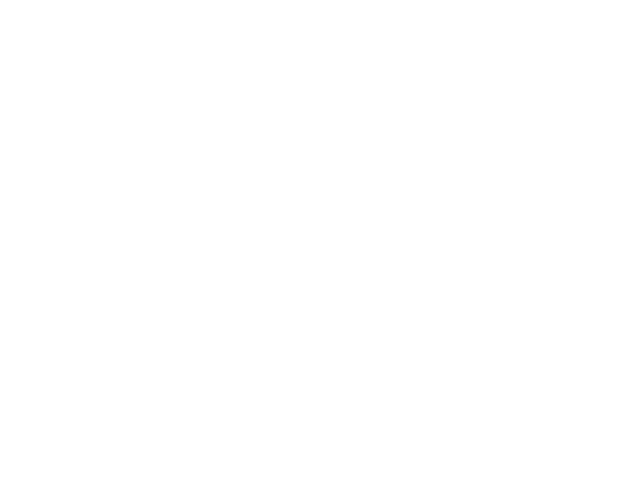

RecursionError: maximum recursion depth exceeded

In [167]:
### Was debugging the convolution

# %matplotlib notebook
# fig=plt.figure();
# ax=plt.subplot(1,1,1);
# fi=ax.imshow(a[:,:].squeeze())

# for i in range(500):
# #     a=rule[rca2ntca[spsig.convolve2d(a,fir,'same')]];
#     a=rule[rca2ntca[
#         np.around(convolve_int(a,fir,'wrap')).astype(np.int)
#     ]]
#     if not (i%step):
#         fi.set_array(a[:,:].squeeze())
#         fig.canvas.draw()
#         time.sleep(0.05)

In [4]:
# fig,ax=plt.subplots()
# ax.imshow(hdist)

In [5]:
# Getting back the objects:
with open('tp','rb') as f:  # Python 3: open(..., 'rb')
    tp, = pickle.load(f)
#     with open('temp','w') as f:
#         f.write(str(tp));

<IPython.core.display.Javascript object>


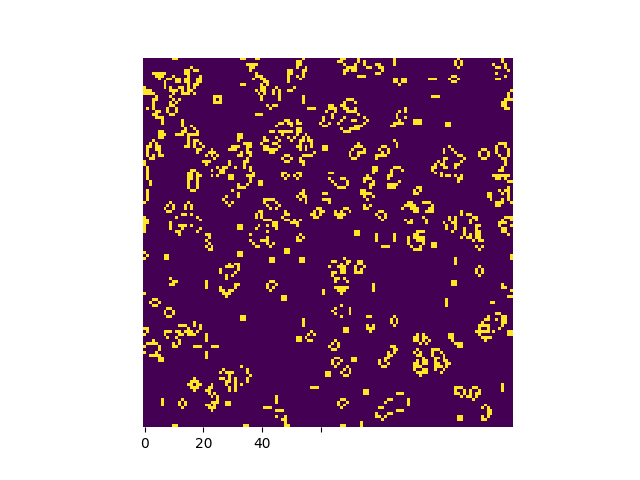

KeyboardInterrupt: 

In [173]:
ca1=CA_sys('2dntca','000000000060031c61c67f86a0',[2,100,16000]);
a=ca1.rdf();
ca1.rulestr2alias();
fig=plt.figure();
ax=plt.subplot(1,1,1);
fi=ax.imshow(a[0,:,:].squeeze())
# ax.imshow()
for i in range(500):
    a=ca1.adv(a,i)
    fi.set_array(a[0,:,:].squeeze())
    fig.canvas.draw()
    time.sleep(0.05)

In [174]:

    
# @function
def measure_temperature(sys0=None,hdist=None,*args,**kwargs):
#     varargin = measure_temperature.varargin
#     nargin = measure_temperature.nargin
    
    sysX=copy.copy(sys0)
    jmax=sysX.N;
    avi=sysX.rdf()
    siz=avi.shape
    siz=(sysX.hmax,)+siz;
    tmp=np.zeros(siz)
    smtmp=np.zeros(siz)

    avc=avi
    i=0
    fir=np.reshape(2 ** (np.arange(0,9)),[1,3,3])
    trans=6
    mtp=0
    stp=0
    while i+1 < sysX.hmax:

        i=i + 1
        avcnew=(sysX.adv(avc,i))
        cavc=convolve_int(avc,fir,'wrap').astype(np.int);
        cavcnew=convolve_int(avcnew,fir,'wrap').astype(np.int);
        idx=np.ravel_multi_index((cavc,cavcnew),[2**9,2**9]);
        tmp[i,:,:,:]=np.expand_dims(hdist.flat[idx],0)
        if i >= trans:
            smtmpnow=np.mean(tmp[i - trans:i,:,:,:],axis=0)
            smtmp[i - trans,:,:,:]=smtmpnow
            if i >= trans + 10:
                mtp=np.mean(smtmpnow.flat)
                stpmat=((smtmp[i - trans,:,:,:] - smtmp[i - trans - trans,:,:,:]))
                a=np.mean(np.abs(stpmat.flat))
                b=abs(np.mean(stpmat.flat))
                stp=a - b
                stp1=np.mean(avcnew.flat)
                stp1=min(stp1,1 - stp1)
        avc=avcnew;
        #     im1=[avc(1,:,:)];
        if mtp < 0.02 and i > 20:
            break
    
    fam_alias=sys0.familyname+'_'+sys0.alias;
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:55
    # s=sprintf('%s\\t%s\\t%d\\t%f\\t%f\\t%f\\n',fam_alias,num2str(sys0.od),i,mtp,stp,stp1)
    s='{}\t{}\t{:d}\t{:f}\t{:f}\t{:f}\n'.format(fam_alias,sysX.rulestr,i,mtp,stp,stp1)
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:56
    return s
    
# if __name__ == '__main__':
#     pass
    

In [55]:
#test
ca1=CA_sys('2dntca','000000000060031c61c67f86a0',[600,100,400]);
a=ca1.rdf();
ca1.rulestr2alias();
s=measure_temperature(ca1,hdist);
print(s)
# fir=2**np.arange(0,9)
# print(fir)

2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk	000000000060031c61c67f86a0	99	0.082277	0.047659	0.057563



In [1]:
# # print('a\tb')
# ntca_list='''0c83820e0060061941946a68f0
# 1733981849c04af6ae996424e0
# 1125390c5add882663707cbf2f
# 2410f90c3c1ad303184fcf7bf5
# 022478c58a1fbb91f2022bf36f
# 3a96bf992f7527f42eb3dab5ef
# 184af6a375706e604132428008
# 009ef96711dfbee0513a90a090
# 06273cd54233f548a66e4bc060
# 305cb6ddda2c4e21184b802670
# 0781dacd5bd3d20501ce483466
# 3d4403a2e9f179119ab1d510b0
# 1cefed47ef30e2abc2fab59c8f
# 31445202992e8424e138e10428
# 2bfcf170f18f47108305a86a90
# 1ff2bc7cc13d268fd438c5d6f4
# 3515080e9f1f901ded2c222408
# 0822c9dff9148d209ab200cae0
# 2f52d5ea152c8c90c2268d8660
# 0715dde195e109487316f371df
# 37fa0df5c75f284a7216801b2b
# 2f6ad89296f7e1e79ee4eff181
# 3b9629635edae6b69e815a5e02
# 1384bbf3f0da584d09c2c88088
# 0045c6f8269fa82435cf56ecff
# 131a8d7c583c89551ccd48c1dc
# 3bfefd222c3875a02d732e6fd0
# 2c13b0a7d574623e8ffa9560e0
# 1cde2410a7da1cdd2db0b6a937'''
# ntca_list=ntca_list.splitlines();
# output=[];

NameError: name 'output' is not defined

In [177]:
for i in range(5):
    for num,rulestr in enumerate(ntca_list):
        ca1=CA_sys('2dntca',rulestr,[400,100,400]);
        ca1.rulestr2alias();
        s=measure_temperature(ca1,hdist);
        output+=[s];
        print('{:d} of {:d}'.format(num,len(ntca_list)))


# (len(ntca_list)+1)/27
# ntca_list

0 of 29
1 of 29
2 of 29
3 of 29
4 of 29
5 of 29
6 of 29
7 of 29
8 of 29
9 of 29
10 of 29
11 of 29
12 of 29
13 of 29
14 of 29
15 of 29
16 of 29
17 of 29
18 of 29
19 of 29
20 of 29
21 of 29
22 of 29
23 of 29
24 of 29
25 of 29
26 of 29


KeyboardInterrupt: 

In [3]:
global output
output

NameError: name 'output' is not defined

In [ ]:
import multiprocessing  
def parafunc(ipt):
    global output
    num,rulestr = ipt;
    ca1=CA_sys('2dntca',rulestr,[400,100,400]);
    ca1.rulestr2alias();
    s=measure_temperature(ca1,hdist);
    print('{:d} of {:d}'.format(num,len(ntca_list)))
#     return s;
    output+=[s];

ipt=enumerate(ntca_list*5)

if __name__ == '__main__':
    pool = multiprocessing.Pool(processes=2)
    pool.map(parafunc, ipt);
    pool.close()
    pool.join()   
    print('done')

0 of 29
19 of 29
1 of 29
20 of 29
2 of 29
21 of 29
3 of 29
22 of 29
4 of 29
23 of 29
5 of 29
24 of 29
6 of 29
25 of 29
7 of 29
26 of 29
8 of 29
27 of 29
9 of 29
28 of 29
10 of 29
29 of 29
30 of 29
11 of 29
31 of 29
12 of 29
32 of 29
13 of 29
33 of 29
14 of 29
34 of 29
15 of 29
35 of 29
16 of 29
36 of 29
17 of 29
37 of 29
18 of 29
38 of 29
57 of 29
39 of 29
58 of 29
40 of 29
59 of 29
41 of 29
60 of 29
42 of 29
61 of 29
43 of 29
62 of 29
44 of 29
63 of 29
45 of 29
64 of 29
46 of 29
65 of 29
47 of 29
66 of 29
48 of 29
67 of 29
49 of 29
68 of 29
50 of 29
69 of 29
51 of 29
70 of 29
52 of 29
71 of 29
53 of 29
72 of 29
54 of 29
55 of 29
73 of 29
56 of 29
74 of 29
76 of 29
75 of 29
77 of 29
95 of 29
78 of 29
96 of 29
79 of 29
97 of 29
80 of 29
98 of 29
81 of 29
99 of 29
82 of 29
100 of 29
83 of 29
101 of 29
84 of 29
102 of 29
85 of 29
103 of 29
86 of 29
104 of 29
87 of 29
88 of 29
105 of 29
89 of 29
106 of 29
90 of 29
107 of 29
91 of 29
108 of 29


In [12]:
import multiprocessing
import pickle

class Thing(object):
    def __getstate__(self):
        print ('got pickled')
        return self.__dict__
    def __setstate__(self, state):
        print ('got unpickled')
        self.__dict__.update(state)

q = multiprocessing.Queue()
p = multiprocessing.Process(target=q.put, args=(Thing(),))
p.start()
print (q.get())
# p.join()

got pickled
got unpickled


In [119]:
import csv
# data=[[]]*5;
from mpld3 import plugins
import mpld3
import matplotlib.patches as mpatches
from mpld3 import utils
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
mpld3.enable_notebook()
class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id","labels"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        var labels = (this.props.labels);
        obj.elements().on("mousedown",
                          function(d, i){
                          txt=labels[i];
                          window.prompt("You clicked Point "+ i + ", Ctrl+C to copy to clipboard, Rulestring:", txt);
                          
                          
                          });
    }
    """
    
#     obj.elements().on("mousedown",
#                           function(d, i){alert("clicked on points[" + labels[i] + "]");});
    def __init__(self, points,labels=None):
        self.dict_ = {"type": "clickinfo",
                      "id": utils.get_id(points),
                     "labels":labels};



    
def put_patches(ax):
    xf1=np.array([0.12,0.4]);
    yf1=np.array([.12,.21]);
    sigma1=np.array([.025]);
    ax.fill_between(xf1,yf1+sigma1, yf1-sigma1, facecolor='green', alpha=0.5,label='Uncond_Comp')


    xf1=np.linspace(.015,.12,50);
    # yf1=np.array([.12,.21]);
    yf1=xf1**0.63/5.7;
    sigma1=.0025+(xf1-0.015)*0.12;
    ax.fill_between(xf1,yf1+sigma1, yf1-sigma1, facecolor='yellow', alpha=0.5,label='Cond_Comp')

    pt1=[.65,.18];
    pt2=[.8,.12];
    pts=np.vstack((pt1,pt2));
    xf1=pts[:,0];
    xf1=np.linspace(xf1[0],xf1[1],50)
    yf1=pts[:,1];
    yf1=np.linspace(yf1[0],yf1[1],50)
    sigma1=.0025+(.8-xf1)*0.26;
    ax.fill_between(xf1,yf1+sigma1, yf1-sigma1, facecolor='red', alpha=0.5,label='Chaos')

In [ ]:
# data=[];
# tst_data=csv2dat(tfmat_path+'/tstA5');
tst_data=[];
for line in output:
    tst_data+=[line.rstrip('\n').split('\t')];
tst_data=np.array(tst_data)
print(tst_data)

In [22]:
%matplotlib inline
col=[];
# data=np.array([[]]);
tst_data=np.array(tst_data)
tst_data=tst_data;
col=col+list(.8 for i in range(tst_data.shape[0]));
data=np.vstack((tst_data));

xs=data[:,3];
xs=xs.astype(np.float)
xs[np.isnan(xs)]=0;
ys=(data[:,4].astype(np.float));
# ys[ys==0]=1;
# ys=np.log(ys);
ys[~np.isfinite(ys)]=0;
zs=(data[:,5].astype(np.float));
zs[~np.isfinite(zs)]=0;


sizs=list((.6-float(x))/.00755 for x in data[:,5])
N = xs.size;
labels=list(data[:,1]);
# labels=data[:,[0,1,3]].T.to_html



fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
#                                        ,projection='3d'
                                      ))
fig.set_size_inches([5,4])
ax.grid(color='white', linestyle='solid')
ax.set_ylim(0,0.38)
ax.set_xlim(0,1)
put_patches(ax)
sct = ax.scatter(xs,
                 ys,
                 c=col,                
                 s = sizs,
                 alpha=1.0,
#                      label=labels,
                     cmap=plt.cm.rainbow)
red_patch = mpatches.Patch(color=plt.cm.rainbow(.98), label='The red data')
pur_patch = mpatches.Patch(color=plt.cm.rainbow(.02), label='The red data')
yel_patch = mpatches.Patch(color=plt.cm.rainbow(.02), label='The red data')
handles, leglabels = ax.get_legend_handles_labels()
handles +=[red_patch,pur_patch];
leglabels +=['reference','sample'];
ax.legend(handles,leglabels)
ax.set_title("Dynamic landscape, 2D projection", size=20)
plugins.connect(fig, 
                plugins.PointLabelTooltip(sct, labels),
#                 plugins.Zoom(enabled=False),
                ClickInfo(sct,labels)
               )
ax.set_xlabel('Avg Temp',size=15);
ax.set_ylabel('mean(abs(d_Temp)) - abs(mean(d_Temp))',size=15);

NameError: name 'tst_data' is not defined